**Team 13: Support for Wellbeings in Pittsburgh Neighborhoods**

With this project, our goal was to answer the question: "What is the best neighborhood in Pittburgh?" and support our argument with data that came from the WPRDC. Our group settled on three key data metrics (least average daily traffic, greatest number of steps, and greatest number of parks) to determine which neighborhood was best at _promoting citizen wellbeing_. We initially considered other metrics, such as the neighborhood that would be best in terms of nature spaces, public resources, or even sewage levels, but settled on this one since our submetrics combined nicely into the relevant and important topic of wellbeing. This final metric will be calculated by averaging the rankings of each neighborhood across our three submetrics. 

_Investigating Submetric 1: Average daily traffic_

This metric uses sensors in each neighborhood to count the average number of cars. The dataset includes 419 average daily car counts data points, but we calculated and used the average daily car count across all recorded days for each neighborhood. 

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
traffic = pd.read_csv("traffic_count.csv")
car_counts = traffic.groupby("neighborhood").mean()['average_daily_car_traffic']

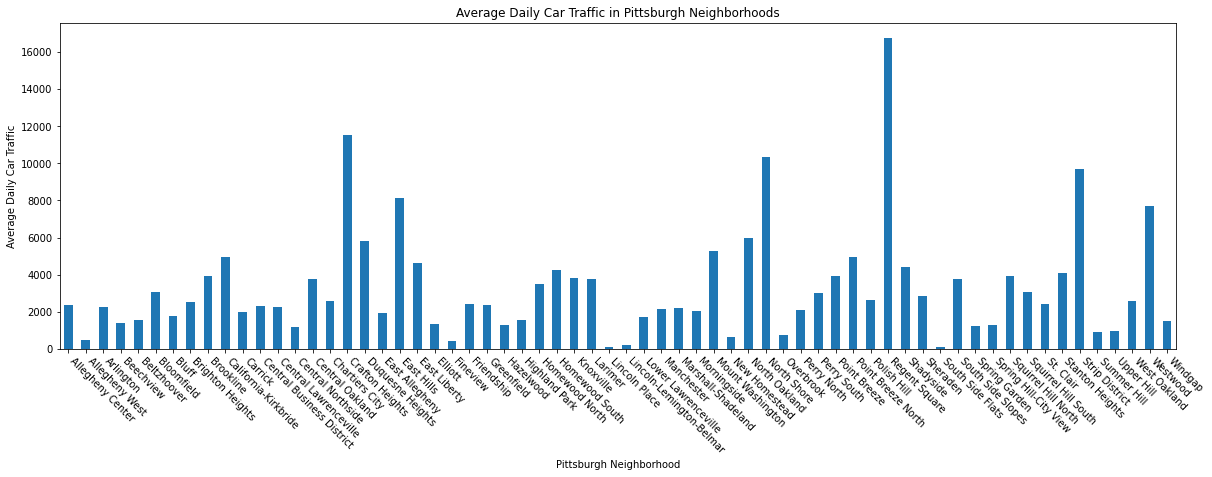

In [124]:
car_counts_clean = car_counts.dropna(axis=0) #remove NaN values from the dataset

#Plot the average daily car traffic counts
plt.figure(figsize=(20,6))
car_counts_clean.plot.bar(rot=-45)
plt.xticks(range(0,len(car_counts_clean),1),ha='left',fontsize=10)
plt.xlabel("Pittsburgh Neighborhood")
plt.ylabel("Average Daily Car Traffic")
plt.title("Average Daily Car Traffic in Pittsburgh Neighborhoods")
plt.show()

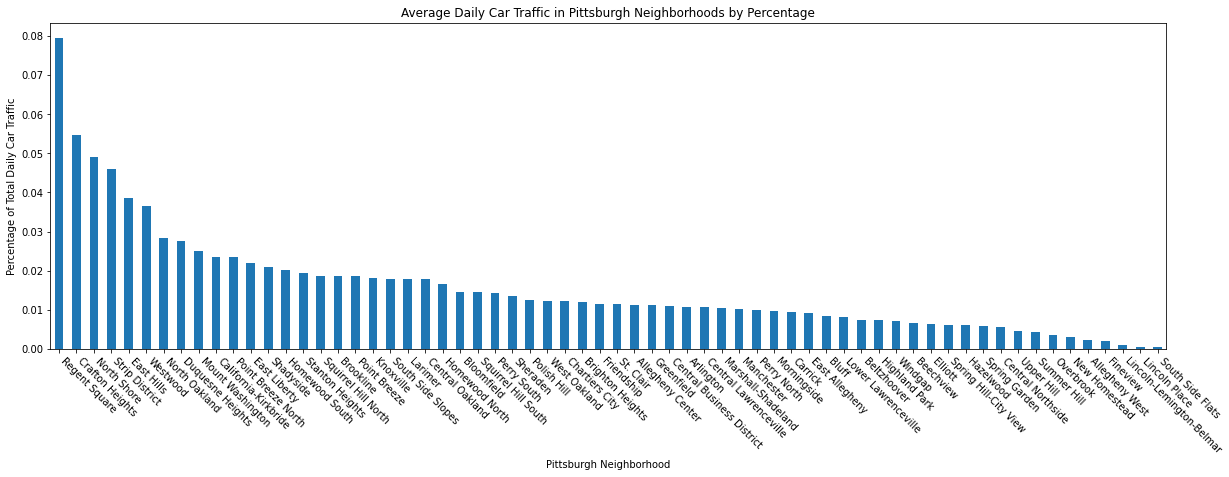

In [5]:
car_percent = car_counts_clean/car_counts_clean.sum() #calculate the percentage of each average traffic count

#Plot the average daily car traffic car counts by descending percentage
plt.figure(figsize=(20,6))
car_percent.sort_values(ascending=False).plot.bar(rot=-45)
plt.xticks(range(0,len(car_counts_clean),1),ha='left',fontsize=10)
plt.xlabel("Pittsburgh Neighborhood")
plt.ylabel("Percentage of Total Daily Car Traffic")
plt.title("Average Daily Car Traffic in Pittsburgh Neighborhoods by Percentage")
plt.show()

From the two graphs above, we can generally see which neighborhoods have the most and least daily car traffic. The second plot with descending probabilities of the total car traffic shows that Regent Square has the highest daily traffic average at 8% of all total daily traffic, which is about 2.5% higher than the next highest daily traffic average in Crafton Heights. From these graphs, we can see that South Side Flats has the lowest average daily car traffic in Pittsburgh, so according to this metric alone, it is the best neighborhood. 

The best neighborhoods here are different from my personal favorite neighboorhoods because I tend to choose neighborhoods based on the vibrance of the communities, as opposed to strictly the number of cars. 

_Investigating Submetric 2: Number of Steps_ <br>
Dataset used -- https://data.wprdc.org/dataset/city-steps <br>
<br>
People typically dislike steps, however, in terms of physical wellbeing they're a great form of exercise. So, the more steps there are the better a neighborhood is when it comes to promoting physical wellbeing.

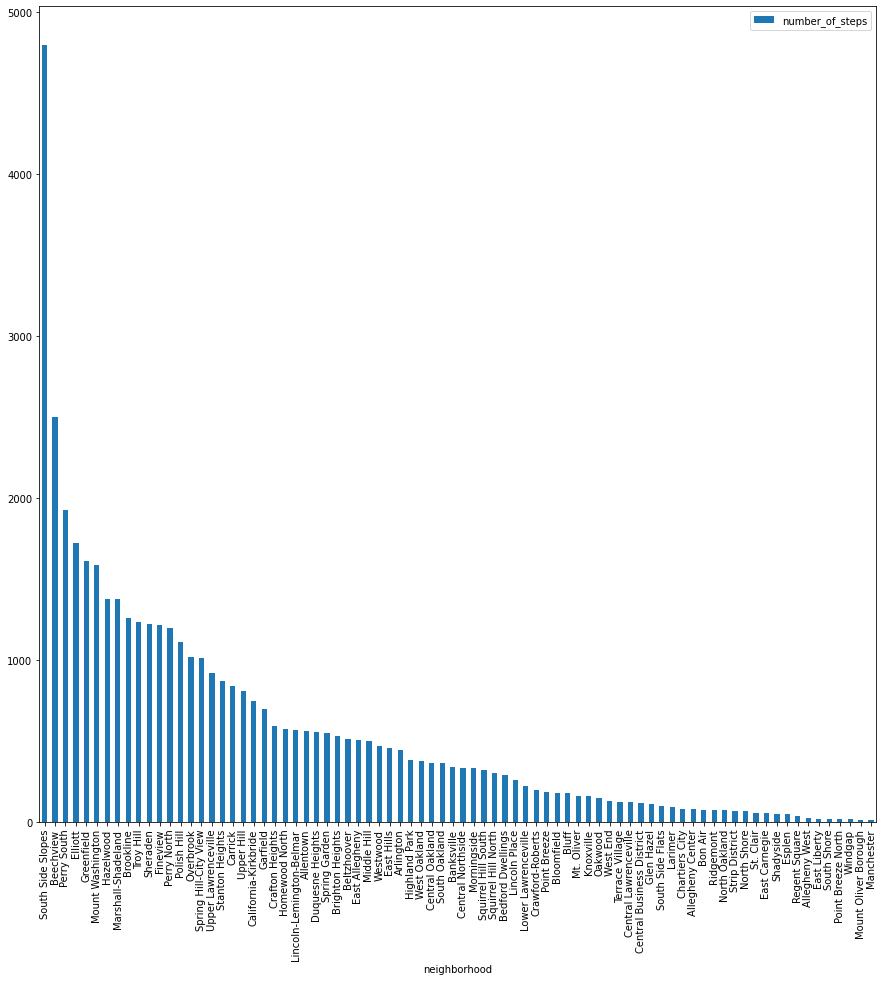

In [18]:
import pandas as pd
import numpy as np

steps = pd.read_csv("steps.csv")
steps = steps.iloc[:,[7, 16]]
steps = steps.groupby('neighborhood').sum().sort_values('number_of_steps', ascending=False)

steps.plot.bar(y='number_of_steps', rot=90,figsize=(15,15))

Conclusion -- South Side Slopes is the "best" neighborhood for the number of steps, which help to promote physical wellbeing.

_why parks?:_ Our overall metric for defining the "best" neighborhood is **promoting citizen well being**. I believe parks contribute a lot to promoting good health in the community especially with children. If a neighborhood has more parks the more opportunities there are to be active and overall just get outside contributing to the overall quality of living and individual health. Therefore, **More parks is equal to a better neighborhood.**

_Investigating Submetric 3: Number of Parks_

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
park = pd.read_csv("parks.csv")
park.head(15)

,_id,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907
5,6,223959093,Allegheny Riverfront Park,Park,Parks - Northern,NaN,Central Business District,6,2,42003020100,6,2,2,1-3,40.444591,-80.002416
6,7,1596467340,Alpine Gardens Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457673,-80.012852
7,8,1829922263,Alton Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414580,-80.021855
8,9,2049886968,Amber Triangle,Traffic Island/Median,2nd Division,NaN,East Liberty,7,8,42003111500,2,8,5,3-23,40.459099,-79.931846
9,10,1047118140,Ammon Park,Park,Parks - Schenley,NaN,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449526,-79.978247


breif overview of the data set: essentially shows name of parks and the neighborhood it is in

In [10]:
count ={}

for index, row in park.iterrows():
    neighborhood = row["neighborhood"]
    
    if neighborhood in count:
        count[neighborhood]+=1
    else:
        count[neighborhood]=1

sort = dict(sorted(count.items(), key=lambda item: item[1])) 
print(sort)

{'Bedford Dwellings': 1, 'Bon Air': 1, 'Windgap': 1, 'Homewood West': 1, 'Arlington': 1, 'Stanton Heights': 1, 'East Carnegie': 1, 'East Hills': 1, 'Esplen': 1, 'Fairywood': 1, 'North Oakland': 1, 'Hays': 1, 'Homewood South': 1, 'Morningside': 1, 'Central Lawrenceville': 1, 'Oakwood': 1, 'Regent Square': 1, 'Upper Hill': 1, 'New Homestead': 1, 'West Oakland': 1, 'Bluff': 1, 'Middle Hill': 1, 'Squirrel Hill North': 1, 'Allegheny Center': 2, 'Banksville': 2, 'Homewood North': 2, 'Spring Garden': 2, 'Perry South': 2, 'Strip District': 2, 'Crafton Heights': 2, 'Allentown': 2, 'Duquesne Heights': 2, 'Fineview': 2, 'Perry North': 2, 'Highland Park': 2, 'Terrace Village': 2, 'Lincoln Place': 2, 'Polish Hill': 2, 'West End': 2, 'Crawford-Roberts': 3, 'North Shore': 3, 'Central Northside': 3, 'Lower Lawrenceville': 3, 'Brookline': 3, 'Lincoln-Lemington-Belmar': 3, 'Westwood': 3, 'Upper Lawrenceville': 3, 'Garfield': 3, 'Greenfield': 3, 'Larimer': 3, 'Bloomfield': 3, 'Spring Hill-City View': 3, 

counts the amount of parks in each neighborhood (east liberty has the most with 12)

neighborhood
Bedford Dwellings             1
Bon Air                       1
Windgap                       1
Homewood West                 1
Arlington                     1
                             ..
South Side Slopes             7
Point Breeze                  7
Beechview                     8
Central Business District    10
East Liberty                 12
Name: parks_count, Length: 73, dtype: int64

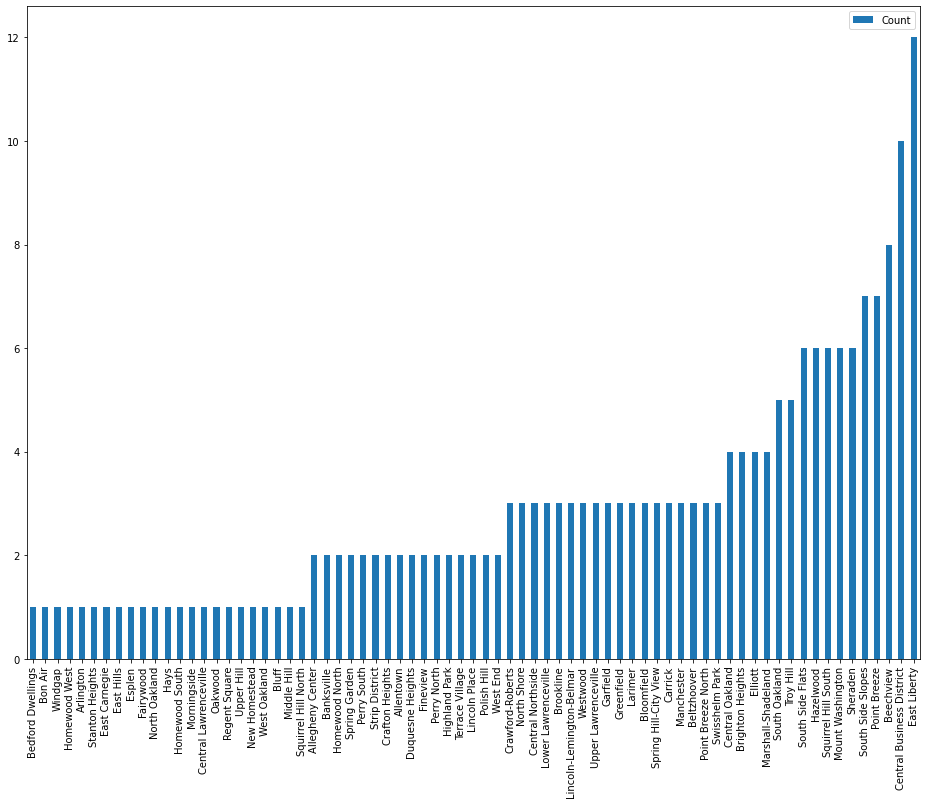

In [133]:
neighborhoods = pd.DataFrame.from_dict(sort, orient='index', columns=['Count'])
neighborhoods.plot.bar(figsize=(16,12))

#prepare data for combining
parks = pd.DataFrame(list(sort.items()), columns=["neighborhood", "park_count"])
park_count = parks["park_count"]
neighborhood = parks["neighborhood"]

parks = pd.Series(park_count.to_list(),index = neighborhood)
parks.rename('parks_count')

shows the same data in a bar graph again we can see east liberty has the most with 12 parks

_conclusion:_ The East Liberty neighborhood is the best neighborhood according to this submetric. Looking at the dataset it has the most number of parks promoting a healthy and active lifestyle which supports residents wellbeing living in Pittsburgh.

**things to note:** this data hasn't been updated since 2021 so it's not a complete accurate representation but it gives a good general idea.

_Consolidating submetrics into final metric_


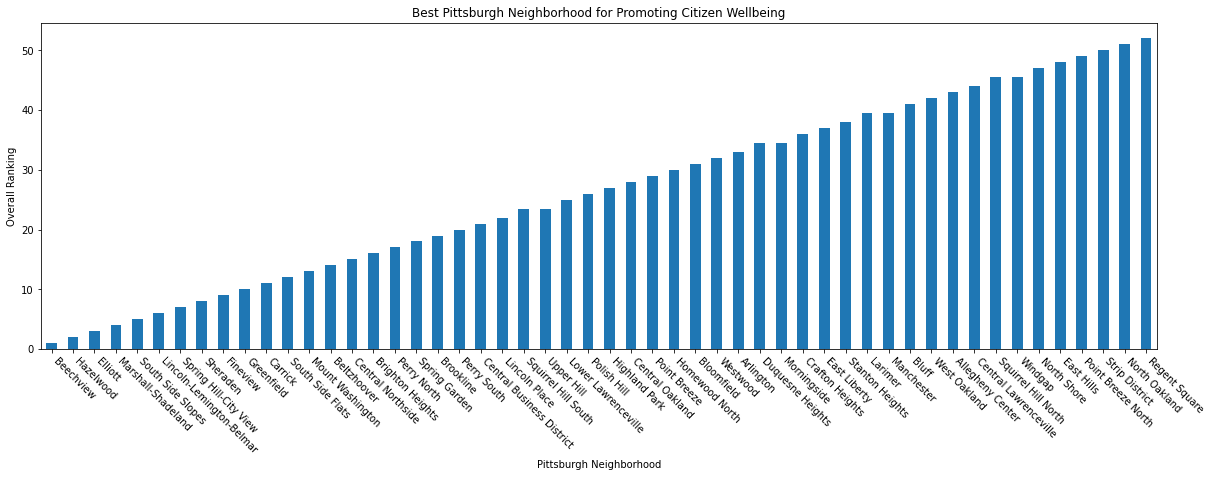

In [171]:
#Highest rank (closest to 1.0) is best
traffic_rank = car_counts_clean.rank(ascending=True) #fewest cars is best
steps_rank = steps.rank(ascending=False) #most steps is best
parks_rank = parks.rank(ascending=False) #most parks is best
parks_rank = parks_rank.rename("park_counts")

#merge all metrics into one dataframe
combined_neighborhood = steps_rank.merge(traffic_rank,on='neighborhood',how='left')
combined_neighborhood = combined_neighborhood.merge(parks_rank,on='neighborhood',how='left')

#drop any neighborhoods where a column has a NaN value
combined_neighborhood = combined_neighborhood.dropna()

#Calculate the final rankings by averaging our rankings
best_neighborhood = combined_neighborhood.sum(axis=1).rank()
best_neighborhood = best_neighborhood.rename('ranking')

#Plot the average daily car traffic counts
plt.figure(figsize=(20,6))
best_neighborhood.sort_values(ascending=True).plot.bar(rot=-45)
plt.xticks(ha='left',fontsize=10)
plt.xlabel("Pittsburgh Neighborhood")
plt.ylabel("Overall Ranking")
plt.title("Best Pittsburgh Neighborhood for Promoting Citizen Wellbeing")
plt.show()

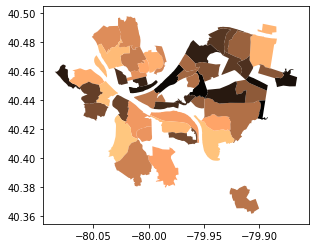

In [182]:
import geopandas
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

#Combine dataframes and plot Pittsburgh regions based on overall ranking
overall_map = neighborhoods.merge(best_neighborhood, how='left', left_on='hood', right_on='neighborhood')

#Plot Pittsburgh map of best neighborhoods (best are lightest)
overall_map.plot(column='ranking',cmap=plt.cm.get_cmap('copper_r'))

The best neighborhood for promoting citizen wellbeing was calculated by averaging the rankings of each neighborhood within each submetric. From these two data visualizations, we can identify that the best neighborhood is Beechview, while the worst neighborhood is Regents Square. The map shows the best neighborhoods in the lightest colors, with the worst ones being close to black. From the map, we can see that many of the larger neighborhoods that are more suburban in nature have a better ranking -- this makes sense, because larger and more suburban neighborhoods have more parks, which likely means more public steps and more spread out traffic (resulting in fewer cars counted at a specific location as in our dataset). 